<a href="https://colab.research.google.com/github/lalit1511/SQL_Projects/blob/main/SQL_HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('/content/HR_Analytics.csv')
df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
conn = sqlite3.connect(':memory:')
df.to_sql('hr_data', conn, index=False, if_exists='replace')


1470

SQL Analysis


In [4]:
# 1. Attrition Rate Overview
query = '''
SELECT
    Attrition,
    COUNT(*) AS total_employees,
    ROUND(CAST(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM hr_data) AS FLOAT), 2) AS percentage
FROM hr_data
GROUP BY Attrition
'''
pd.read_sql_query(query, conn)


,Attrition,total_employees,percentage
0,No,1233,83.88
1,Yes,237,16.12


In [5]:
#🔸 2. Department-wise Attrition
query = '''
SELECT
    Department,
    SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attrition_count,
    COUNT(*) AS total_employees,
    ROUND(SUM(CASE WHEN Attrition = 'Yes' THEN 1.0 ELSE 0 END) * 100.0 / COUNT(*), 2) AS attrition_rate
FROM hr_data
GROUP BY Department
ORDER BY attrition_rate DESC
'''
pd.read_sql_query(query, conn)


,Department,attrition_count,total_employees,attrition_rate
0,Sales,92,446,20.63
1,Human Resources,12,63,19.05
2,Research & Development,133,961,13.84


In [6]:
#🔸 3. Job Role with Highest Attrition
query = '''
SELECT
    JobRole,
    SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attrition_count,
    COUNT(*) AS total_employees,
    ROUND(SUM(CASE WHEN Attrition = 'Yes' THEN 1.0 ELSE 0 END) * 100.0 / COUNT(*), 2) AS attrition_rate
FROM hr_data
GROUP BY JobRole
ORDER BY attrition_rate DESC
'''
pd.read_sql_query(query, conn)


,JobRole,attrition_count,total_employees,attrition_rate
0,Sales Representative,33,83,39.76
1,Laboratory Technician,62,259,23.94
2,Human Resources,12,52,23.08
3,Sales Executive,57,326,17.48
4,Research Scientist,47,292,16.10
5,Manufacturing Director,10,145,6.90
6,Healthcare Representative,9,131,6.87
7,Manager,5,102,4.90
8,Research Director,2,80,2.50


In [7]:
#🔸 4. Monthly Income vs Attrition
query = '''
SELECT
    Attrition,
    ROUND(AVG(MonthlyIncome), 2) AS avg_income
FROM hr_data
GROUP BY Attrition
'''
pd.read_sql_query(query, conn)


,Attrition,avg_income
0,No,6832.74
1,Yes,4787.09


<ipython-input-8-9aacc7f8b4a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


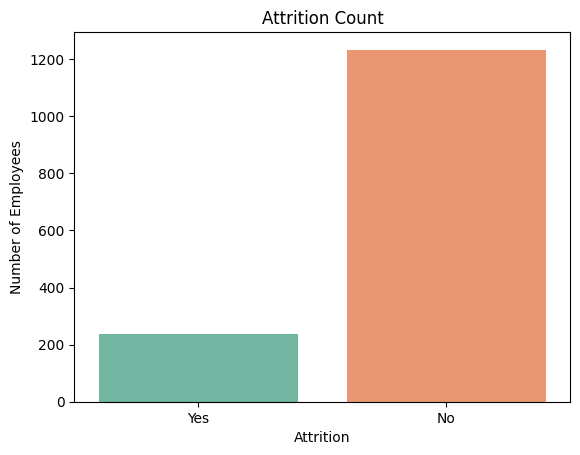

In [8]:
#📊 Section 3: Visual Insights
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()


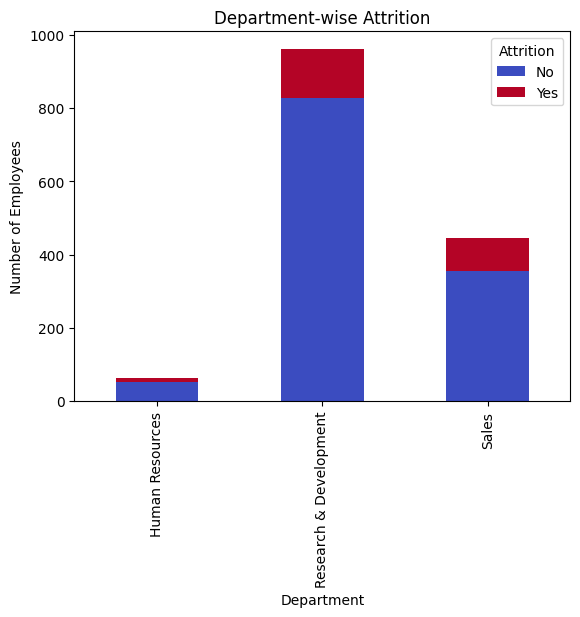

In [9]:
#🔹 2. Department-wise Attrition Rate
dept_attrition = df.groupby(['Department', 'Attrition']).size().unstack()
dept_attrition.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Department-wise Attrition')
plt.ylabel('Number of Employees')
plt.show()


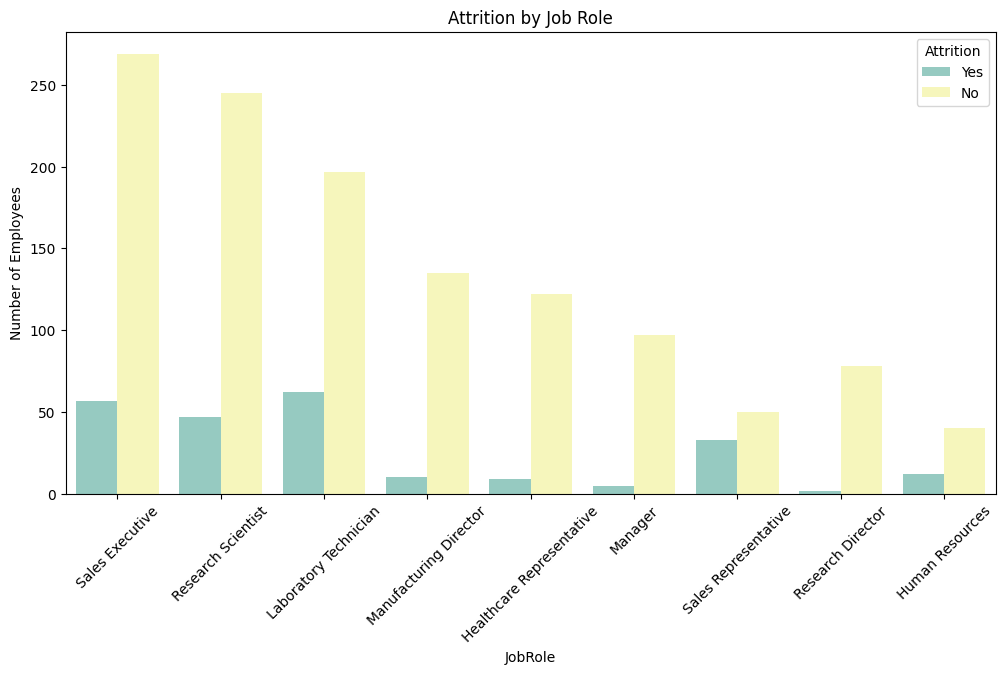

In [10]:
#🔹 3. Job Role vs Attrition
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='Set3')
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.ylabel('Number of Employees')
plt.show()


<ipython-input-11-d742dc22520b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set1')


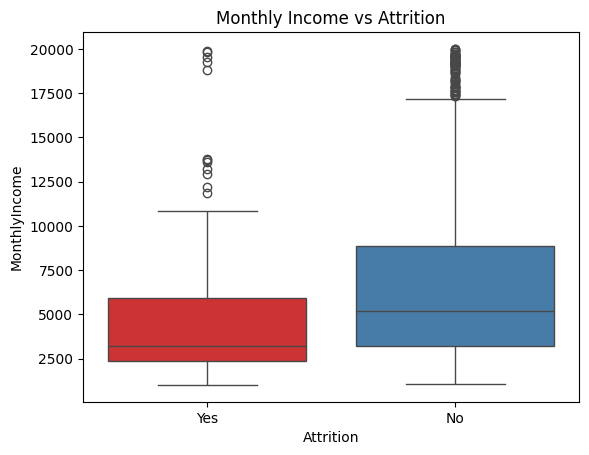

In [11]:
#🔹 4. Monthly Income by Attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set1')
plt.title('Monthly Income vs Attrition')
plt.show()


🧾 Final Section: Project Summary for Portfolio
Here’s how you can document and showcase this HR Analytics Project on your GitHub, resume, or portfolio site.

📌 Project Title:
HR Analytics: Employee Attrition & Insights Using SQL + Python (Google Colab)

📄 Overview:
Analyzed an HR dataset containing employee demographics, job roles, departments, attrition status, and salary data to uncover patterns in employee turnover. Combined SQL for deep data analysis and Python (Matplotlib/Seaborn) for visual storytelling.

🎯 Objectives:
Analyze attrition rates across departments and roles

Explore salary and job satisfaction impact on attrition

Identify high-risk job roles and departments

Present results with interactive SQL queries and clean visualizations

🧮 Key SQL Insights:
Overall attrition rate was X% (replace with actual from your output)

Highest attrition found in [Department Name] and [Job Role]

Employees who left had a lower average monthly income

Trends indicate possible job dissatisfaction or growth issues